In [1]:
#Linear Algebra
import numpy as np
#Data preprocessing
import pandas as pd
#setting display options
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
pd.set_option('max_colwidth', 300)
np.set_printoptions(linewidth =400)
#Catboost Classifier Algorithm
#from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import classification_report
#Matlab-style plotting
from matplotlib import pyplot as plt
%matplotlib inline
#Advance-style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')
#Ignore annoying warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):k
    pass
warnings.warn = ignore_warn

In [2]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

In [3]:
from catboost import CatBoostRegressor

In [4]:
Wonx_Sample = pd.read_csv("SampleSubmission.csv")
Wonx_Sample.head()

,ward,target
0,21001001: Ward 1,21.87
1,21001002: Ward 2,65.94
2,21001003: Ward 3,83.65
3,21001004: Ward 4,NaN
4,21001005: Ward 5,NaN


In [5]:
Wonx_train = pd.read_csv("Train.csv")
Wonx_train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [6]:


Wonx_test = pd.read_csv("Test.csv")
Wonx_test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,0.000668,0.002078,0.0,0.0,0.246694,0.615326,0.000000,0.016724,0.121257,0.155406,0.844594,0.216589,0.783411,0.173569,0.826431,0.817552,0.022885,0.000643,0.125655,0.000400,0.000125,0.002761,0.006069,0.000384,0.000131,0.000259,0.0,0.004612,0.0,0.018525,0.173136,0.736099,0.003712,0.083467,0.003586,0.921001,0.551691,0.427445,0.012457,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,0.006492,0.006853,0.0,0.0,0.193484,0.532209,0.000936,0.052571,0.220800,0.406129,0.593871,0.498555,0.501445,0.366732,0.633268,0.434771,0.106254,0.000439,0.289230,0.001222,0.001483,0.002284,0.003142,0.001063,0.000162,0.000000,0.0,0.005779,0.0,0.154172,0.471349,0.191902,0.002854,0.324584,0.009311,0.955494,0.759594,0.227192,0.009606,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,0.044153,0.013530,0.000000,0.000000,0.007695,0.0,0.0,0.295614,0.499440,0.011465,0.078808,0.114673,0.237233,0.762767,0.190044,0.809956,0.090176,0.909824,0.953113,0.015398,0.000380,0.017653,0.000766,0.000190,0.002090,0.001140,0.003230,0.002241,0.000755,0.0,0.003043,0.0,0.000000,0.079592,0.914919,0.001520,0.000549,0.003420,0.975955,0.704033,0.291719,0.001996,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,0.101963,0.001516,0.009203,0.000000,0.003157,0.0,0.0,0.265445,0.519198,0.000000,0.014156,0.201201,0.343086,0.656914,0.348310,0.651690,0.248744,0.751256,0.852038,0.020889,0.000985,0.018133,0.000219,0.000552,0.000865,0.005020,0.000766,0.000000,0.000109,0.0,0.001208,0.0,0.099216,0.102274,0.832795,0.006965,0.054769,0.003197,0.965817,0.556172,0.439729,0.002060,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,0.027930,0.001617,0.017343,0.000000,0.004291,0.0,0.0,0.285008,0.552023,0.000187,0.053495,0.109287,0.255566,0.744434,0.182219,0.817781,0.137765,0.862235,0.965567,0.011856,0.000374,0.010614,0.001126,0.000000,0.001869,0.004672,0.000747,0.000000,0.000747,0.0,0.002429,0.0,0.000000,0.033536,0.956602,0.007059,0.000000,0.002803,0.951707,0.444380,0.553173,0.000787,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754


In [7]:
var_desc = pd.read_csv("variable_descriptions.csv")
pd.set_option('display.max_colwidth', 200) # So that we can see the full descriptions
var_desc

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat,NaN,NaN


In [8]:
for i in list(Wonx_train):
    if ((Wonx_train[i]==0).all()):
        print(i)
        del Wonx_train[i]

dw_12
dw_13
lan_13
pw_07
pw_08


In [9]:
for i in list(Wonx_test):
    if ((Wonx_test[i]==0).all()):
        print(i)
        del Wonx_test[i]

dw_12
dw_13
lan_13
pw_07
pw_08


In [10]:
Wonx_test = pd.read_csv("Test.csv")
Wonx_test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,0.000668,0.002078,0.0,0.0,0.246694,0.615326,0.000000,0.016724,0.121257,0.155406,0.844594,0.216589,0.783411,0.173569,0.826431,0.817552,0.022885,0.000643,0.125655,0.000400,0.000125,0.002761,0.006069,0.000384,0.000131,0.000259,0.0,0.004612,0.0,0.018525,0.173136,0.736099,0.003712,0.083467,0.003586,0.921001,0.551691,0.427445,0.012457,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,0.006492,0.006853,0.0,0.0,0.193484,0.532209,0.000936,0.052571,0.220800,0.406129,0.593871,0.498555,0.501445,0.366732,0.633268,0.434771,0.106254,0.000439,0.289230,0.001222,0.001483,0.002284,0.003142,0.001063,0.000162,0.000000,0.0,0.005779,0.0,0.154172,0.471349,0.191902,0.002854,0.324584,0.009311,0.955494,0.759594,0.227192,0.009606,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,0.044153,0.013530,0.000000,0.000000,0.007695,0.0,0.0,0.295614,0.499440,0.011465,0.078808,0.114673,0.237233,0.762767,0.190044,0.809956,0.090176,0.909824,0.953113,0.015398,0.000380,0.017653,0.000766,0.000190,0.002090,0.001140,0.003230,0.002241,0.000755,0.0,0.003043,0.0,0.000000,0.079592,0.914919,0.001520,0.000549,0.003420,0.975955,0.704033,0.291719,0.001996,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,0.101963,0.001516,0.009203,0.000000,0.003157,0.0,0.0,0.265445,0.519198,0.000000,0.014156,0.201201,0.343086,0.656914,0.348310,0.651690,0.248744,0.751256,0.852038,0.020889,0.000985,0.018133,0.000219,0.000552,0.000865,0.005020,0.000766,0.000000,0.000109,0.0,0.001208,0.0,0.099216,0.102274,0.832795,0.006965,0.054769,0.003197,0.965817,0.556172,0.439729,0.002060,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,0.027930,0.001617,0.017343,0.000000,0.004291,0.0,0.0,0.285008,0.552023,0.000187,0.053495,0.109287,0.255566,0.744434,0.182219,0.817781,0.137765,0.862235,0.965567,0.011856,0.000374,0.010614,0.001126,0.000000,0.001869,0.004672,0.000747,0.000000,0.000747,0.0,0.002429,0.0,0.000000,0.033536,0.956602,0.007059,0.000000,0.002803,0.951707,0.444380,0.553173,0.000787,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754


In [11]:
Wonx_test.shape

(1013, 62)

In [12]:
Wonx_train.shape

(2822, 58)

Text(0.5, 0, 'Percentage of households that are w-headed and have income under R19.6k/month')

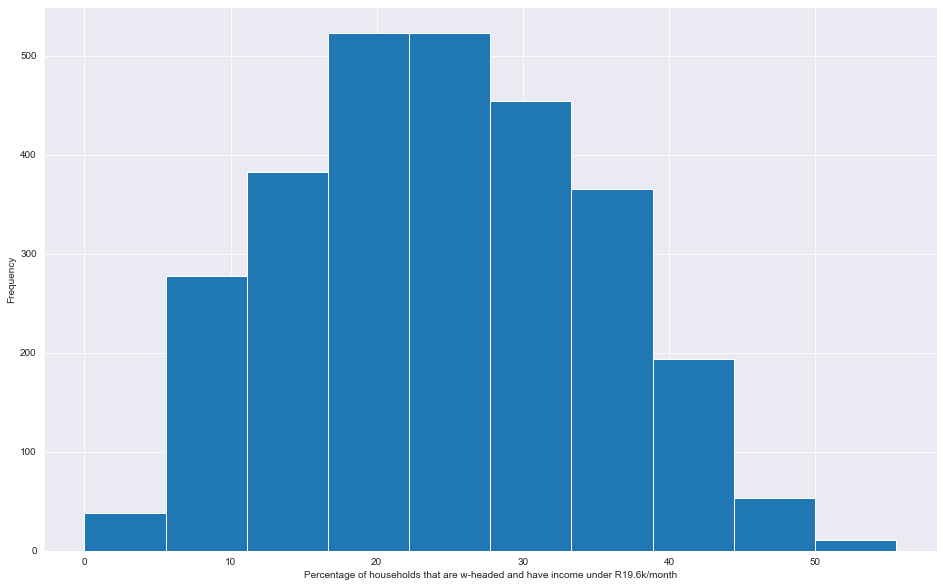

In [13]:
# Plot the distribution
ax = Wonx_train['target'].plot(kind='hist')
plt.xlabel('Percentage of households that are w-headed and have income under R19.6k/month')

In [14]:
Wonx_train.corr()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,lat,lon,NL
total_households,1.000000,0.959244,-0.374833,-0.226119,-0.231304,0.222825,0.328743,0.314811,0.095374,0.284317,0.267116,0.240964,0.128285,-0.057963,-0.001159,-0.348228,0.304959,0.106763,0.321778,-0.189969,0.250416,-0.250416,0.253040,-0.253040,0.292774,-0.292774,-0.034003,0.384818,-0.019893,0.104534,-0.064717,-0.028589,-0.032726,-0.100976,-0.045081,-0.041664,0.048105,0.045326,0.373283,0.018370,-0.151855,-0.083354,0.221372,0.183153,0.108861,0.093197,0.337449,-0.097993,-0.140827,-0.149199,-0.121961,-0.110339,-0.228412,0.063018,0.032249,0.708701
total_individuals,0.959244,1.000000,-0.293827,-0.200350,-0.161183,0.178921,0.255194,0.245253,0.109852,0.252280,0.205278,0.186950,0.080483,-0.078160,-0.002963,-0.242333,0.187257,0.103006,0.353433,-0.157760,0.206140,-0.206140,0.200226,-0.200226,0.251397,-0.251397,-0.082232,0.340476,-0.015302,0.057173,0.027323,-0.031766,-0.067826,-0.131588,-0.053589,-0.034436,0.065083,0.053421,0.296255,-0.007718,-0.092933,-0.093178,0.229503,0.103576,0.077212,0.075161,0.288838,-0.094539,-0.127982,-0.135562,-0.103966,-0.084651,-0.174518,0.039653,0.104198,0.684853
target,-0.374833,-0.293827,1.000000,0.018461,0.458206,-0.232727,-0.338137,-0.385533,-0.146357,-0.248573,-0.177763,-0.186627,-0.235331,-0.128540,-0.109490,0.782472,-0.707506,-0.097613,-0.301572,0.203999,-0.664181,0.664181,-0.702831,0.702831,-0.637835,0.637835,-0.507942,-0.438704,-0.020163,-0.142685,0.232266,0.275263,-0.038563,-0.046968,-0.003930,0.066230,0.106548,0.210597,-0.325367,-0.287004,0.613346,-0.232792,-0.224005,-0.583908,-0.213812,-0.260286,-0.754536,0.113646,0.442441,0.440941,0.389467,0.349653,0.470676,0.120381,0.347088,-0.514398
dw_00,-0.226119,-0.200350,0.018461,1.000000,-0.614702,-0.356335,-0.154956,-0.126421,-0.076181,-0.181262,-0.228804,-0.364130,-0.076239,-0.025813,-0.119659,0.053266,0.061978,-0.100414,-0.215588,-0.116875,0.204563,-0.204563,0.103555,-0.103555,0.016995,-0.016995,0.080893,-0.112058,0.079717,-0.133999,-0.432648,0.284967,0.083131,0.100746,-0.061157,0.099285,0.111999,0.147429,-0.175611,-0.059788,-0.013708,0.070832,-0.062480,-0.007774,-0.046675,0.526407,0.098374,0.180496,-0.064290,-0.079610,-0.059986,-0.038534,-0.297510,0.348089,-0.152692,-0.133895
dw_01,-0.231304,-0.161183,0.458206,-0.614702,1.000000,0.000617,-0.075112,-0.112250,-0.095776,-0.099431,-0.236245,-0.223481,-0.102495,-0.009229,-0.016891,0.469828,-0.522799,0.036300,0.052726,0.199668,-0.389343,0.389343,-0.304002,0.304002,-0.243632,0.243632,-0.202522,-0.158659,-0.069958,-0.047451,0.610104,-0.167927,-0.184446,-0.161752,0.004287,-0.033338,-0.041126,-0.061126,-0.191934,-0.109161,0.229224,-0.121589,-0.094507,-0.182425,-0.107281,-0.600681,-0.407428,-0.203044,0.222130,0.250931,0.202204,0.211378,0.600377,-0.346198,0.349469,-0.338058
dw_02,0.222825,0.178921,-0.232727,-0.356335,0.000617,1.000000,0.199940,0.205096,0.015692,0.086548,-0.138369,-0.102479,0.104707,0.016612,-0.016776,-0.111500,0.022469,0.101216,0.221837,0.037600,0.232527,-0.232527,0.263602,-0.263602,0.294071,-0.294071,0.093623,0.347070,-0.024555,0.022487,0.080942,-0.119165,-0.104374,-0.119998,-0.062700,-0.047990,-0.037483,-0.084470,0.394650,0.224816,-0.240298,0.019088,0.205087,0.233521,0.112925,0.035062,0.341398,-0.266980,-0.135700,-0.128604,-0.096198,-0.061072,-0.040765,-0.126910,0.075945,0.304287
dw_03,0.328743,0.255194,-0.338137,-0.154956,-0.075112,0.199940,1.000000,0.724167,0.026997,0.030068,-0.101747,-0.073226,0.088665,0.003593,-0.004090,-0.198897,0.179108,0.090417,0.214318,-0.140442,0.479304,-0.479304,0.547242,-0.547242,0.542958,-0.542958,0.189141,0.555675,-0.050849,-0.026189,-0.055222,-0.093948,-0.095697,-0.090969,-0.101411,-0.037249,-0.

In [15]:
# Strong +ve correlations
Wonx_train.corr()['target'].sort_values(ascending=False).head(10)

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

In [16]:
# Strong -ve correlations
Wonx_train.corr()['target'].sort_values().head(10)

pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
pg_03    -0.583908
NL       -0.514398
lan_00   -0.507942
lan_01   -0.438704
dw_04    -0.385533
Name: target, dtype: float64

In [17]:
len_train= len(Wonx_train)
new_df = pd.concat([Wonx_train, Wonx_test])

In [18]:
len_train

2822

In [19]:
new_df

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL,dw_12,dw_13,lan_13,pw_07,pw_08
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039,NaN,NaN,NaN,NaN,NaN
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775,NaN,NaN,NaN,NaN,NaN
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000,NaN,NaN,NaN,NaN,NaN
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778,NaN,NaN,NaN,NaN,NaN
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,19100107: Ward 107,16076.89903,43296.51372,NaN,0.668295,0.002827,0.207749,0.028813,0.069741,0.010701,0.003941,0.000804,0.002530,0.003673,0.000000,0.000926,0.233077,0.612635,0.000293,0.053580,0.100415,0.658908,0.341092,0.882464,0.117536,0.558145,0.441855,0.165559,0.608453,0.006922,0.074446,0.015429,0.003975,0.008570,0.008775,0.001703,0.002086,0.003400,0.002927,0.087869,0.009885,0.257872,0.079057,0.028981,0.619228,0.014863,0.996591,0.992238,0.004045,0.000609,0.000392,0.000291,0.000148,0.002277,ZA1910107,

In [20]:
new_df.isna().sum()

ward                    0
total_households        0
total_individuals       0
target               1013
dw_00                   0
dw_01                   0
dw_02                   0
dw_03                   0
dw_04                   0
dw_05                   0
dw_06                   0
dw_07                   0
dw_08                   0
dw_09                   0
dw_10                   0
dw_11                   0
psa_00                  0
psa_01                  0
psa_02                  0
psa_03                  0
psa_04                  0
stv_00                  0
stv_01                  0
car_00                  0
car_01                  0
lln_00                  0
lln_01                  0
lan_00                  0
lan_01                  0
lan_02                  0
lan_03                  0
lan_04                  0
lan_05                  0
lan_06                  0
lan_07                  0
lan_08                  0
lan_09                  0
lan_10                  0
lan_11      

In [21]:
numeric_features = new_df.select_dtypes(include=[np.number])
numeric_features.dtypes

total_households     float64
total_individuals    float64
target               float64
dw_00                float64
dw_01                float64
dw_02                float64
dw_03                float64
dw_04                float64
dw_05                float64
dw_06                float64
dw_07                float64
dw_08                float64
dw_09                float64
dw_10                float64
dw_11                float64
psa_00               float64
psa_01               float64
psa_02               float64
psa_03               float64
psa_04               float64
stv_00               float64
stv_01               float64
car_00               float64
car_01               float64
lln_00               float64
lln_01               float64
lan_00               float64
lan_01               float64
lan_02               float64
lan_03               float64
lan_04               float64
lan_05               float64
lan_06               float64
lan_07               float64
lan_08        

In [22]:
numeric_features

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,lat,lon,NL,dw_12,dw_13,lan_13,pw_07,pw_08
0,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,-29.682270,24.734743,0.292039,NaN,NaN,NaN,NaN,NaN
1,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,-29.119311,24.757737,3.207775,NaN,NaN,NaN,NaN,NaN
2,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,-29.142276,25.094093,0.000000,NaN,NaN,NaN,NaN,NaN
3,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,-29.372052,24.942867,2.038778,NaN,NaN,NaN,NaN,NaN
4,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,-29.409381,25.290165,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,16076.89903,43296.51372,NaN,0.668295,0.002827,0.207749,0.028813,0.069741,0.010701,0.003941,0.000804,0.002530,0.003673,0.000000,0.000926,0.233077,0.612635,0.000293,0.053580,0.100415,0.658908,0.341092,0.882464,0.117536,0.558145,0.441855,0.165559,0.608453,0.006922,0.074446,0.015429,0.003975,0.008570,0.008775,0.001703,0.002086,0.003400,0.002927,0.087869,0.009885,0.257872,0.079057,0.028981,0.619228,0.014863,0.996591,0.992238,0.004045,0.000609,0.000392,0.000291,0.000148,0.002277,-33.806524,18.496094,33.913055,0.0,0.0,0.0,0.0,0.0
1009,17470.24004,53538.12816,NaN,0.483111,0.000824,0.001189,0.000870,0.000554,0.000370,0.001954,0.088044,0.416686,0.000066,0.000224,0.006

In [23]:
numeric_features = new_df.select_dtypes(exclude=[np.number])
numeric_features.dtypes

ward          object
ADM4_PCODE    object
dtype: object

In [24]:
numeric_features

,ward,ADM4_PCODE
0,41601001: Ward 1,ZA4161001
1,41601002: Ward 2,ZA4161002
2,41601003: Ward 3,ZA4161003
3,41601004: Ward 4,ZA4161004
4,41601005: Ward 5,ZA4161005
...,...,...
1008,19100107: Ward 107,ZA1910107
1009,19100108: Ward 108,ZA1910108
1010,19100109: Ward 109,ZA1910109
1011,19100110: Ward 110,ZA1910110


In [25]:
new_df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL,dw_12,dw_13,lan_13,pw_07,pw_08
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039,NaN,NaN,NaN,NaN,NaN
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775,NaN,NaN,NaN,NaN,NaN
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000,NaN,NaN,NaN,NaN,NaN
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778,NaN,NaN,NaN,NaN,NaN
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000,NaN,NaN,NaN,NaN,NaN


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
new_df['total_households'] = StandardScaler().fit_transform(new_df['total_households'].values.reshape(-1,1))
new_df['total_individuals'] = StandardScaler().fit_transform(new_df['total_individuals'].values.reshape(-1,1))
new_df['house_ind'] = new_df['total_individuals'] / new_df['total_households']

In [28]:
new_df['rich'] = new_df['car_01']+new_df['stv_00']+new_df['psa_01']
new_df['poor'] = new_df['car_00'] +new_df['stv_01']+new_df['psa_00']

In [29]:
new_df= new_df.drop(["ward","stv_01","stv_00","dw_12","dw_13","lan_13","pw_07","pw_08" ], axis=1)

In [30]:
#Manhattan distnace
def manhattan_distance(lat, lon):
    a = np.abs(lat -lon)
    return a
new_df['manhattan_dist'] = manhattan_distance(new_df['lon'].values, new_df['lat'].values,)
new_df.head()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL,house_ind,rich,poor,manhattan_dist
0,-0.586795,-0.696546,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.260191,0.607898,0.000188,0.010018,0.121705,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039,1.187035,1.617639,1.250451,54.417013
1,-0.566943,-0.608010,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.290228,0.549788,0.000000,0.021336,0.138647,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775,1.072437,1.508791,1.331225,53.877049
2,-0.355349,-0.551812,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.186435,0.677005,0.000489,0.021315,0.114757,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000,1.552873,1.570556,1.292883,54.236370
3,-0.565738,-0.712612,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.281229,0.593281,0.000579,0.007249,0.117663,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778,1.259615,1.553173,1.321336,54.314918
4,-0.568999,-0.616173,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.196687,0.517578,0.000989,0.005148,0.279598,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000,1.082907,1.459046,1.255219,54.699547


In [31]:
#Bearing
def bearing_array(lat, lng):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lat - lng)
    lat, lng = map(np.radians, (lat, lng))
    y = np.sin(lng_delta_rad) * np.cos(lat)
    x = np.cos(lat) * np.sin(lat) - np.sin(lng) * np.cos(lng) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
new_df['bearing'] = bearing_array(new_df['lat'].values, new_df['lon'].values,)
new_df.head()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL,house_ind,rich,poor,manhattan_dist,bearing
0,-0.586795,-0.696546,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.260191,0.607898,0.000188,0.010018,0.121705,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039,1.187035,1.617639,1.250451,54.417013,-132.671575
1,-0.566943,-0.608010,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.290228,0.549788,0.000000,0.021336,0.138647,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775,1.072437,1.508791,1.331225,53.877049,-132.618684
2,-0.355349,-0.551812,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.186435,0.677005,0.000489,0.021315,0.114757,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000,1.552873,1.570556,1.292883,54.236370,-132.516898
3,-0.565738,-0.712612,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.281229,0.593281,0.000579,0.007249,0.117663,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778,1.259615,1.553173,1.321336,54.314918,-132.582652
4,-0.568999,-0.616173,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.196687,0.517578,0.000989,0.005148,0.279598,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000,1.082907,1.459046,1.255219,54.699547,-132.477911


In [32]:
#new_df['bearing'] = StandardScaler().fit_transform(new_df['bearing'].values.reshape(-1,1))
#new_df['manhattan_dist'] = StandardScaler().fit_transform(new_df['manhattan_dist'].values.reshape(-1,1))

In [33]:
#new_df['LNll']=new_df.NL/new_df.total_households 

In [34]:
new_df

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL,house_ind,rich,poor,manhattan_dist,bearing
0,-0.586795,-0.696546,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.260191,0.607898,0.000188,0.010018,0.121705,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039,1.187035,1.617639,1.250451,54.417013,-132.671575
1,-0.566943,-0.608010,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.290228,0.549788,0.000000,0.021336,0.138647,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775,1.072437,1.508791,1.331225,53.877049,-132.618684
2,-0.355349,-0.551812,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.186435,0.677005,0.000489,0.021315,0.114757,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000,1.552873,1.570556,1.292883,54.236370,-132.516898
3,-0.565738,-0.712612,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.281229,0.593281,0.000579,0.007249,0.117663,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778,1.259615,1.553173,1.321336,54.314918,-132.582652
4,-0.568999,-0.616173,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.196687,0.517578,0.000989,0.005148,0.279598,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000,1.082907,1.459046,1.255219,54.699547,-132.477911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,3.984968,3.213113,NaN,0.668295,0.002827,0.207749,0.028813,0.069741,0.010701,0.003941,0.000804,0.002530,0.003673,0.000000,0.000926,0.233077,0.612635,0.000293,0.053580,0.100415,0.882464,0.117536,0.558145,0.441855,0.165559,0.608453,0.006922,0.074446,0.015429,0.003975,0.008570,0.008775,0.001703,0.002086,0.003400,0.002927,0.087869,0.009885,0.257872,0.079057,0.028981,0.619228,0.014863,0.996591,0.992238,0.004045,0.000609,0.000392,0.000291,0.000148,0.002277,ZA1910107,-33.806524,18.496094,33.913055,0.806308,1.389079,1.456634,52.302618,-134.508587
1009,4.427256,4.283496

In [35]:
numeric_features = new_df.select_dtypes(include=[np.number])
numeric_features.dtypes

total_households     float64
total_individuals    float64
target               float64
dw_00                float64
dw_01                float64
dw_02                float64
dw_03                float64
dw_04                float64
dw_05                float64
dw_06                float64
dw_07                float64
dw_08                float64
dw_09                float64
dw_10                float64
dw_11                float64
psa_00               float64
psa_01               float64
psa_02               float64
psa_03               float64
psa_04               float64
car_00               float64
car_01               float64
lln_00               float64
lln_01               float64
lan_00               float64
lan_01               float64
lan_02               float64
lan_03               float64
lan_04               float64
lan_05               float64
lan_06               float64
lan_07               float64
lan_08               float64
lan_09               float64
lan_10        

In [36]:
train = new_df[:len_train]
test = new_df[len_train:]
test.drop("target",axis=1, inplace=True)

In [37]:
train.shape

(2822, 60)

In [38]:
test.shape

(1013, 59)

<AxesSubplot:>

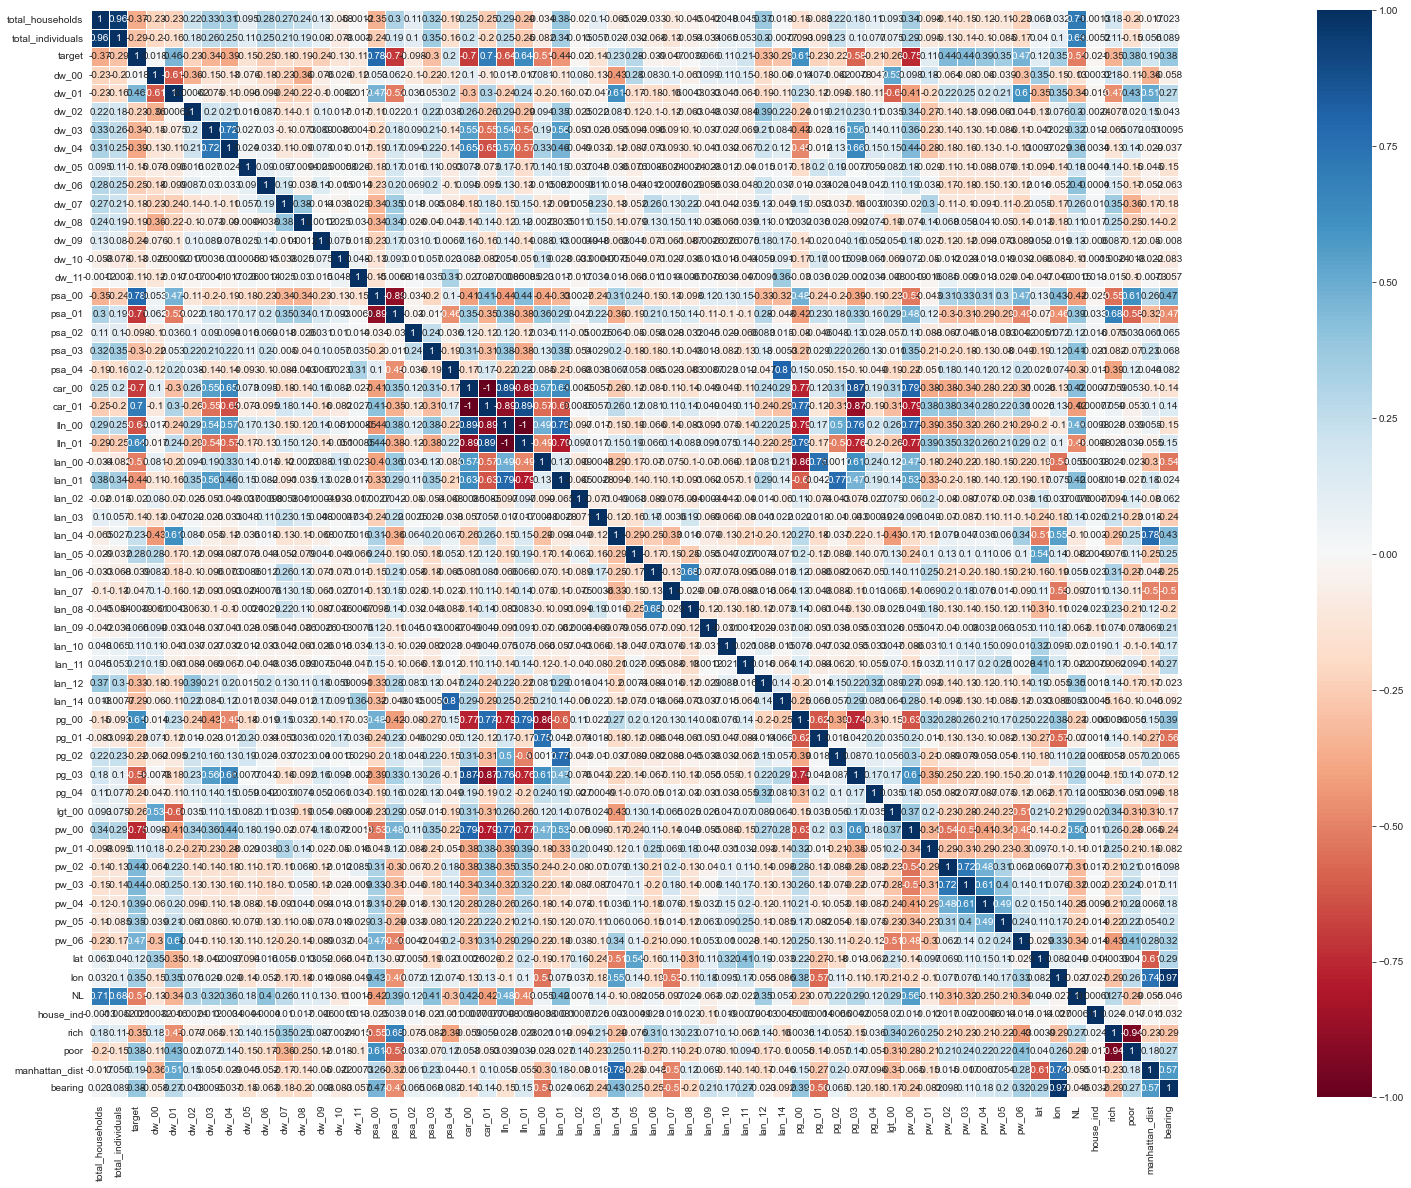

In [39]:
#correlelogram- plot heatmap to find correlation among features
corrmat =train.corr()
f, ax = plt.subplots(figsize=(50,20))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

In [40]:
test

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL,house_ind,rich,poor,manhattan_dist,bearing
0,-0.323169,-0.397958,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,0.000668,0.002078,0.246694,0.615326,0.000000,0.016724,0.121257,0.216589,0.783411,0.173569,0.826431,0.817552,0.022885,0.000643,0.125655,0.000400,0.000125,0.002761,0.006069,0.000384,0.000131,0.000259,0.000000,0.004612,0.018525,0.173136,0.736099,0.003712,0.083467,0.003586,0.921001,0.551691,0.427445,0.012457,0.001757,0.000000,0.000000,0.006649,ZA2101001,-32.637758,23.848688,0.000000,1.231423,1.554142,1.307877,56.486446,-133.157714
1,-0.457974,-0.553373,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,0.006492,0.006853,0.193484,0.532209,0.000936,0.052571,0.220800,0.498555,0.501445,0.366732,0.633268,0.434771,0.106254,0.000439,0.289230,0.001222,0.001483,0.002284,0.003142,0.001063,0.000162,0.000000,0.000000,0.005779,0.154172,0.471349,0.191902,0.002854,0.324584,0.009311,0.955494,0.759594,0.227192,0.009606,0.000691,0.000000,0.000000,0.002916,ZA2101002,-31.990536,24.555818,0.000000,1.208307,1.439783,1.285909,56.546353,-132.905673
2,-0.767039,-0.693314,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,0.044153,0.013530,0.000000,0.000000,0.007695,0.295614,0.499440,0.011465,0.078808,0.114673,0.190044,0.809956,0.090176,0.909824,0.953113,0.015398,0.000380,0.017653,0.000766,0.000190,0.002090,0.001140,0.003230,0.002241,0.000755,0.000000,0.003043,0.000000,0.079592,0.914919,0.001520,0.000549,0.003420,0.975955,0.704033,0.291719,0.001996,0.002253,0.000000,0.000000,0.000000,ZA2101003,-32.283595,24.563940,8.269556,0.903884,1.546629,1.248425,56.847535,-132.925309
3,-0.427728,-0.237486,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,0.101963,0.001516,0.009203,0.000000,0.003157,0.265445,0.519198,0.000000,0.014156,0.201201,0.348310,0.651690,0.248744,0.751256,0.852038,0.020889,0.000985,0.018133,0.000219,0.000552,0.000865,0.005020,0.000766,0.000000,0.000109,0.000000,0.001208,0.099216,0.102274,0.832795,0.006965,0.054769,0.003197,0.965817,0.556172,0.439729,0.002060,0.000000,0.000661,0.000000,0.001379,ZA2101004,-32.261612,24.542202,8.626625,0.555228,1.513974,1.270669,56.803814,-132.930061
4,-0.714914,-0.682946,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,0.027930,0.001617,0.017343,0.000000,0.004291,0.285008,0.552023,0.000187,0.053495,0.109287,0.182219,0.817781,0.137765,0.862235,0.965567,0.011856,0.000374,0.010614,0.001126,0.000000,0.001869,0.004672,0.000747,0.000000,0.000747,0.000000,0.002429,0.000000,0.033536,0.956602,0.007059,0.000000,0.002803,0.951707,0.444380,0.553173,0.000787,0.000000,0.000000,0.000000,0.001660,ZA2101005,-32.251571,24.558537,8.601754,0.955284,1.625371,1.211660,56.810109,-132.924502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,3.984968,3.213113,0.668295,0.002827,0.207749,0.028813,0.069741,0.010701,0.003941,0.000804,0.002530,0.003673,0.000000,0.000926,0.233077,0.612635,0.000293,0.053580,0.100415,0.882464,0.117536,0.558145,0.441855,0.165559,0.608453,0.006922,0.074446,0.015429,0.003975,0.008570,0.008775,0.001703,0.002086,0.003400,0.002927,0.087869,0.009885,0.257872,0.079057,0.028981,0.619228,0.014863,0.996591,0.992238,0.004045,0.000609,0.000392,0.000291,0.000148,0.002277,ZA1910107,-33.806524,18.496094,33.913055,0.806308,1.389079,1.456634,52.302618,-134.508587
1009,4.427256,4.283496,0.483111,0.000824,0.001189,0.000870,0.000554,0.000370,0.001954,0

In [41]:
target= Wonx_train["target"]
train =train.drop(["ADM4_PCODE",'target'], axis=1)
test_id = Wonx_Sample["ward"]
test= test.drop(["ADM4_PCODE" ], axis=1)

In [42]:
train

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,lat,lon,NL,house_ind,rich,poor,manhattan_dist,bearing
0,-0.586795,-0.696546,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.260191,0.607898,0.000188,0.010018,0.121705,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,-29.682270,24.734743,0.292039,1.187035,1.617639,1.250451,54.417013,-132.671575
1,-0.566943,-0.608010,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.290228,0.549788,0.000000,0.021336,0.138647,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,-29.119311,24.757737,3.207775,1.072437,1.508791,1.331225,53.877049,-132.618684
2,-0.355349,-0.551812,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.186435,0.677005,0.000489,0.021315,0.114757,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,-29.142276,25.094093,0.000000,1.552873,1.570556,1.292883,54.236370,-132.516898
3,-0.565738,-0.712612,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.281229,0.593281,0.000579,0.007249,0.117663,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,-29.372052,24.942867,2.038778,1.259615,1.553173,1.321336,54.314918,-132.582652
4,-0.568999,-0.616173,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.196687,0.517578,0.000989,0.005148,0.279598,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,-29.409381,25.290165,0.000000,1.082907,1.459046,1.255219,54.699547,-132.477911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,-0.082961,-0.104651,0.874972,0.003146,0.017230,0.004735,0.048888,0.000654,0.017798,0.005539,0.010383,0.004955,0.003680,0.008020,0.249796,0.548069,0.000199,0.056862,0.145074,0.795676,0.204324,0.197108,0.802892,0.592857,0.056264,0.010778,0.012704,0.014871,0.007861,0.016431,0.222928,0.002182,0.001071,0.001738,0.005115,0.006115,0.049084,0.387404,0.212121,0.005720,0.389049,0.005706,0.977207,0.918325,0.074058,0.000472,0.000472,0.000472,0.000000,0.006203,-27.675590,23.057920,9.118927,1.261445,1.498877,1.298989,50.733510,-133.002278
2818,-0.653895,-0.485357,0.636235,0.002262,0.010433,0.000000,0.003030,0.000000,0.008028,0.095099,0.210044,0.010001,0.003154,0.021716,0.243611,0.597921,0.000000,0

In [43]:
X = train
y= target

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=1234)

In [45]:
#categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb=[]
y_pred_totcb=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=5)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostRegressor(n_estimators=800,eval_metric='RMSE', max_depth=4,learning_rate=0.1,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli',#leaf_estimation_iterations=10,
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
                    #CatBoostClassifier(n_estimators=1000,eval_metric='AUC',max_depth=5,learning_rate=0.1,reg_lambda=5,#5
                              #subsample=0.9,bootstrap_type='Bernoulli',
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     #use_best_model=True)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],early_stopping_rounds=100,verbose=100)
    preds=m.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    errcb.append(sqrt(mean_squared_error(y_test,preds)))
    p = m.predict(test)
    y_pred_totcb.append(p)

0:	learn: 9.7774474	test: 9.7774474	test1: 9.3083488	best: 9.3083488 (0)	total: 177ms	remaining: 2m 21s
100:	learn: 3.1932359	test: 3.1932359	test1: 3.9708815	best: 3.9708815 (100)	total: 964ms	remaining: 6.67s
200:	learn: 2.5484984	test: 2.5484984	test1: 3.6729104	best: 3.6729104 (200)	total: 1.69s	remaining: 5.05s
300:	learn: 2.1462202	test: 2.1462202	test1: 3.5924217	best: 3.5912935 (299)	total: 2.29s	remaining: 3.79s
400:	learn: 1.8607154	test: 1.8607154	test1: 3.5506422	best: 3.5504110 (399)	total: 2.89s	remaining: 2.88s
500:	learn: 1.6283718	test: 1.6283718	test1: 3.5508254	best: 3.5462734 (494)	total: 3.49s	remaining: 2.08s
600:	learn: 1.4257312	test: 1.4257312	test1: 3.5370520	best: 3.5334942 (593)	total: 4.47s	remaining: 1.48s
700:	learn: 1.2601170	test: 1.2601170	test1: 3.5223695	best: 3.5223111 (698)	total: 5.56s	remaining: 785ms
799:	learn: 1.1162720	test: 1.1162720	test1: 3.5143763	best: 3.5143763 (799)	total: 6.39s	remaining: 0us

bestTest = 3.514376278
bestIteration = 79

In [48]:
np.mean(errcb)

3.8093019445624576

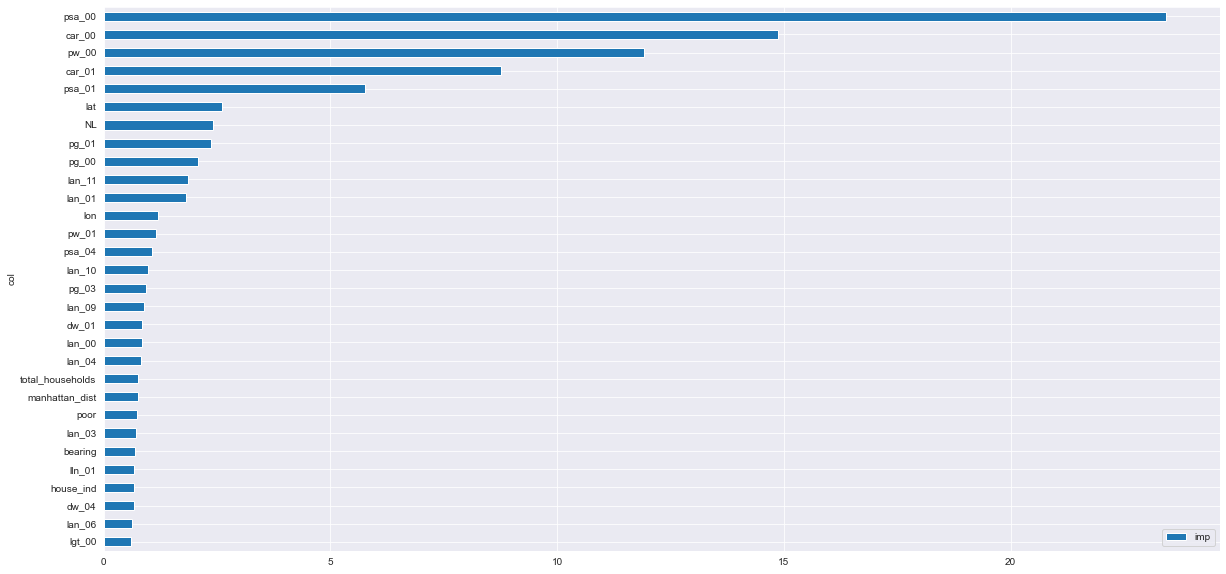

In [49]:
fea_imp = pd.DataFrame({'imp':m.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [50]:
d = {"ward": test_id, 'target': np.mean(y_pred_totcb, 0)}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["ward", 'target']]

In [51]:
#test_predictions.to_csv('in14.csv', index=False)
test_predictions.to_csv('catboostnorm.csv', index=False)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, NuSVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, StackingRegressor,HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from vecstack import stacking
from vecstack import StackingTransformer

In [53]:
cvprds =  np.mean(y_pred_totcb, 0)

In [64]:
catboost=pd.read_csv('catboost.csv')

In [70]:
estms = [('xgb', XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=300,reg_alpha=0.8)),
    ('rf', RandomForestRegressor()),
    ('lgb', LGBMRegressor(max_depth=4, learning_rate=0.1, n_estimators=800, reg_alpha=0.8)),
    ('svr', SVR()),
    ('lasso', Lasso()),
    ('kneiba', KNeighborsRegressor()),
    ('cat', CatBoostRegressor(n_estimators=800,eval_metric='RMSE', max_depth=4,learning_rate=0.1,logging_level='Silent'))
     ]

predictions1 = StackingRegressor(estimators=estms, final_estimator=CatBoostRegressor(logging_level='Silent')).fit(X, y).predict(test)

In [71]:
predictions

array([17.28536558, 12.42438819, 19.21160738, ..., 17.14938376, 13.96793053, 15.6296945 ])

In [89]:
stack = [x*0.5 + y*0.5 for x, y in zip(predictions,catboost.target)]

In [102]:
stack_2 = [x*0.5 + y*0.5 for x, y in zip(stack, cvprds)]

In [103]:
# Further averaging, blending and retraining to generalise well
#
X = test.copy()
y = stack_2
ridge = Ridge()
ridge.fit(X, y)
preds_ridge = ridge.predict(X)
cat = CatBoostRegressor(n_estimators=300,verbose = False)
cat.fit(X, y)
preds_cat = cat.predict(X)

In [104]:
f2 = [x*0.3 +y*0.7 for x, y in zip(preds_ridge, preds_cat)]

In [105]:
sub_df = pd.DataFrame({'ward': test_id, 'target': f2}) 
sub_df.to_csv('s&c&r.csv', index = False)

In [100]:
# Making the final prediction
f1=pd.read_csv('f_submission4.csv')
f3 = [x*0.7 + y*0.3 for x, y in zip(f1.target, f2)]
sub_df = pd.DataFrame({'ward': test_id, 'target': f3}) 
sub_df.to_csv('f_submission5.csv', index = False)

In [106]:
# Making the final prediction
f1=pd.read_csv('f_submission4.csv')
f3 = [x*0.65 + y*0.35 for x, y in zip(f1.target, f2)]
sub_df = pd.DataFrame({'ward': test_id, 'target': f3}) 
sub_df.to_csv('f_submission6.csv', index = False)